In [47]:
%matplotlib inline
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing.plugin_event_accumulator import EventAccumulator
import glob
import numpy as np

In [48]:
input_date = '2022-06-30/14-17-48'
model_date = '2022-06-30/14-17-55'

In [49]:
input_root = f'outputs/multirun/main_all/supervised/income/input/{input_date}/**/events*'
model_root = f'outputs/multirun/main_all/supervised/income/model/{model_date}/**/events*'

In [50]:
num_comb = 32
num_path = 3

In [51]:
def get_results(root):
    path = glob.glob(root)
    path.sort()
    path = path[:num_path]
    results = [[] for _ in range(num_comb)]
    for p in path:
        ea = EventAccumulator(p)
        ea.Reload()
        # acc
        tag = ea.Tags()['tensors'][-1]
        for i, t in enumerate(ea.Tensors(tag)):
            results[i] += [t.tensor_proto.float_val[0]]
    return results

In [52]:
def show_box(results, title):
    # 箱ひげ図
    plt.figure(figsize=(40, 60))
    fig, ax = plt.subplots()

    bp = ax.boxplot(results)#, whis=np.inf)
    ax.set_xticklabels(list(range(num_comb)))

    m = np.mean(results[0])
    plt.plot([0, num_comb + 1], [m, m])

    plt.title(title)
    plt.xlabel('augment number')
    plt.ylabel('acc')
    # Y軸のメモリのrange
    plt.ylim([85.0, 86.5])
    plt.xlim([0, num_comb + 1])
    plt.grid()

    # 描画
    plt.show()
    # plt.savefig(f'outputs/results/{title}.png', format="png", dpi=100)
    plt.close()


3 3


<Figure size 2880x4320 with 0 Axes>

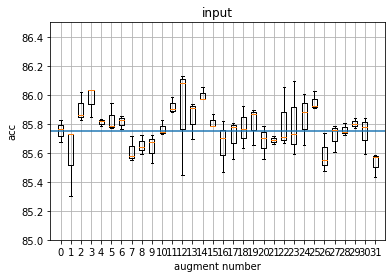

<Figure size 2880x4320 with 0 Axes>

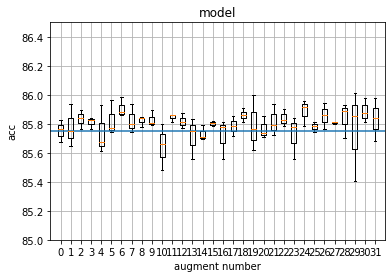

In [53]:
results_input = get_results(input_root)
results_model = get_results(model_root)
print(len(results_input[0]), len(results_model[0]))
show_box(results_input, 'input')
show_box(results_model, 'model')